In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from datetime import datetime
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print(" Libraries imported successfully!")

 Libraries imported successfully!


In [6]:
df = pd.read_csv('../data/togo-dapaong_qc.csv')
# 1. Summary Statistics for all numeric columns
print("\n📈 SUMMARY STATISTICS (df.describe()):")
print(df.describe())
# 2. Missing Value Analysis
print("\n🔍 MISSING VALUE ANALYSIS (df.isna().sum() / %):")
missing_data = df.isna().sum()
print ("missing values count per colum ")
print(missing_data)
missing_percent = (missing_data / len(df)) * 100

missing_report = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent
})
print("Final Missing Value Report:")
print(missing_report)


📈 SUMMARY STATISTICS (df.describe()):
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.0000

In [7]:
# 3. List columns with >5% nulls
print("\n  COLUMNS WITH >5% MISSING VALUES:")
high_missing_cols = missing_report[missing_report['Missing_Percent'] > 5]

if not high_missing_cols.empty:
    print(high_missing_cols)
    print(f"\nTotal columns with >5% missing: {len(high_missing_cols)}")
else:
    print(" No columns have more than 5% missing values")


  COLUMNS WITH >5% MISSING VALUES:
          Missing_Count  Missing_Percent
Comments         525600            100.0

Total columns with >5% missing: 1


In [8]:
from scipy.stats import zscore
import os

# Step 1: Define columns to check
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Step 2: Compute Z-scores for selected columns
print("\n2.  OUTLIERS DETECTION")
z_scores = df[[col for col in columns_to_check if col in df.columns]].apply(zscore)
outliers = (z_scores.abs() > 3)


for col in columns_to_check:
    if col in df.columns:
        outlier_count = outliers[col].sum()
        print(f"   {col}: {outlier_count} outliers")

# Step 3: Handle missing values (impute with median)
print("\n3. 🧩 HANDLING MISSING VALUES")
for col in columns_to_check:
    if col in df.columns:
        missing_count = df[col].isna().sum()
        if missing_count > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"   {col}: Filled {missing_count} missing values with median {median_val:.2f}")

# Step 4: Drop rows containing any outlier
print("\n4. 🧹 DROPPING OUTLIER ROWS")
outlier_rows = outliers.any(axis=1)
print(f"   Total rows with outliers: {outlier_rows.sum()}")
df_cleaned = df[~outlier_rows]
print(f"   Remaining rows after cleaning: {len(df_cleaned)}")

# Step 5: Export cleaned DataFrame
print("\n5. 💾 EXPORTING CLEANED DATA")

# Ensure data directory exists
os.makedirs('../data', exist_ok=True)

# Export cleaned data
output_path = '../data/togo_clean.csv'
df_cleaned.to_csv(output_path, index=False)

print(f"    Cleaned DataFrame exported to {output_path}")
print(f"    Final shape: {df_cleaned.shape}")

# ===============================================
print("\n✅ OUTLIER DETECTION & CLEANING COMPLETED!")


2.  OUTLIERS DETECTION
   GHI: 305 outliers
   DNI: 1062 outliers
   DHI: 3415 outliers
   ModA: 137 outliers
   ModB: 206 outliers
   WS: 3510 outliers
   WSgust: 3915 outliers

3. 🧩 HANDLING MISSING VALUES

4. 🧹 DROPPING OUTLIER ROWS
   Total rows with outliers: 9251
   Remaining rows after cleaning: 516349

5. 💾 EXPORTING CLEANED DATA
    Cleaned DataFrame exported to ../data/togo_clean.csv
    Final shape: (516349, 19)

✅ OUTLIER DETECTION & CLEANING COMPLETED!


TIME SERIES ANALYSIS

1. 📈 TIME SERIES TRENDS


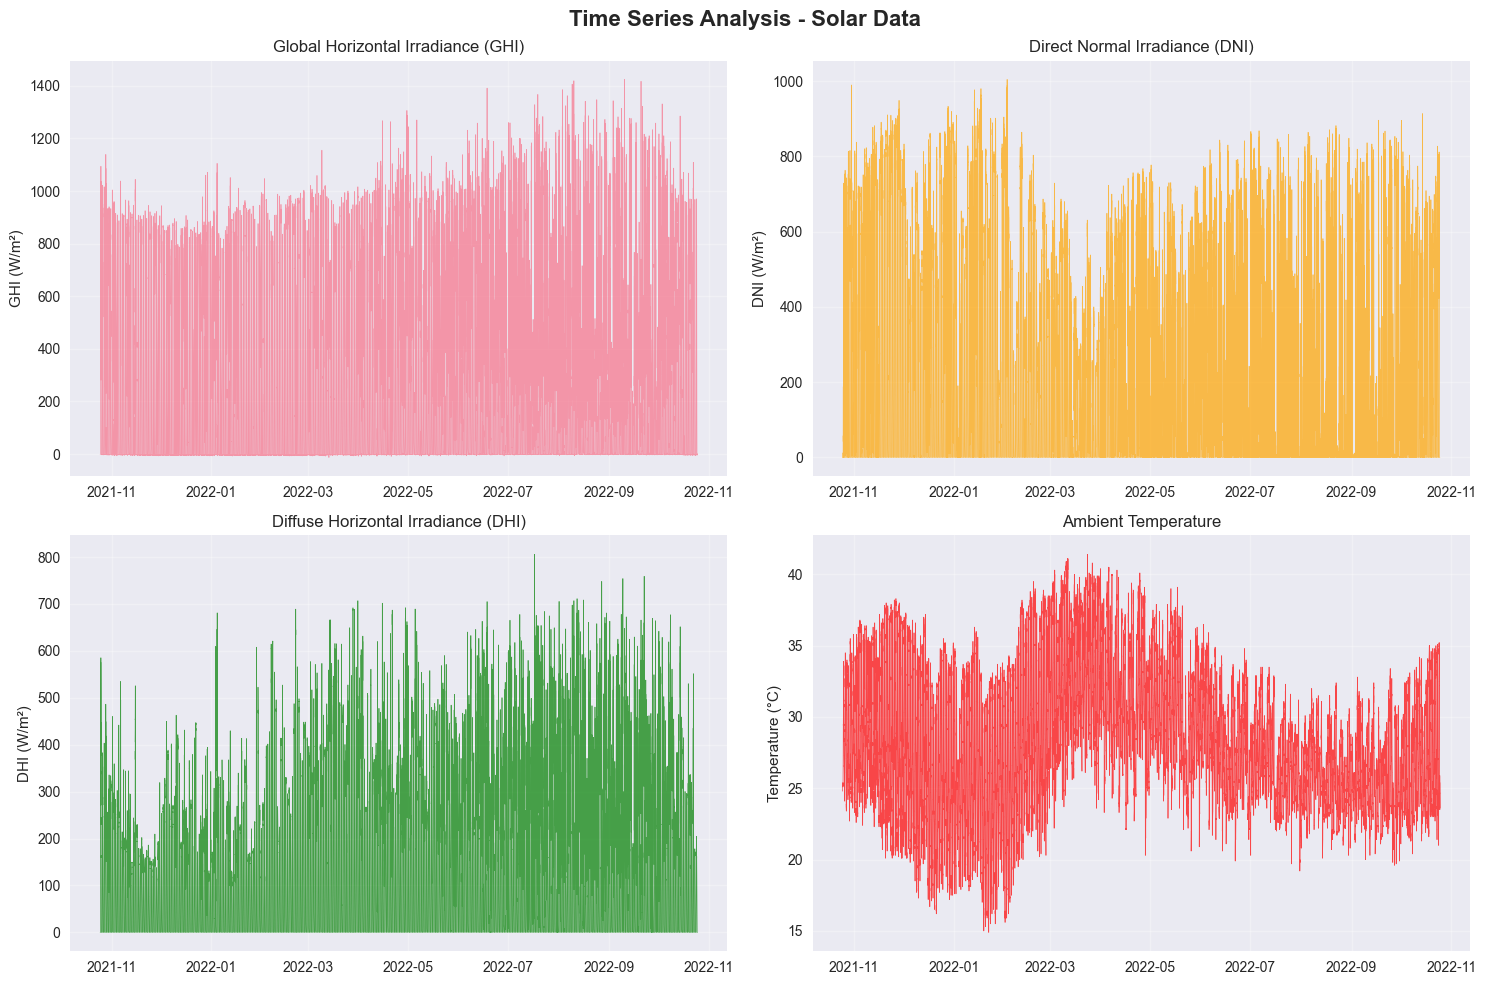


2. 🌅 DAILY PATTERNS


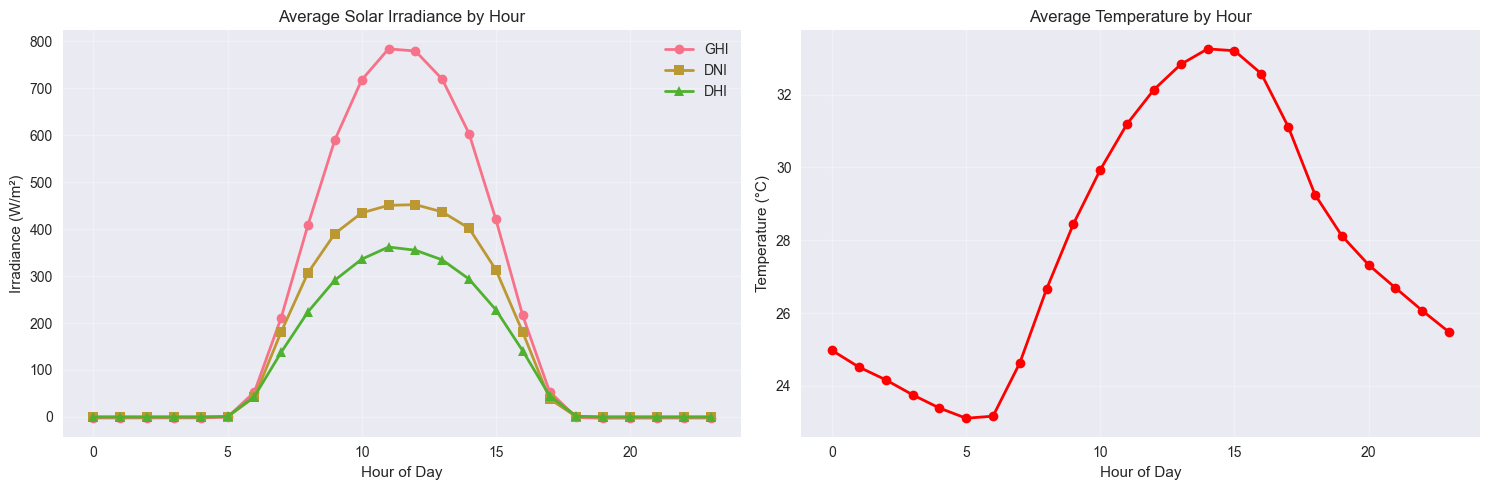


3. 📅 MONTHLY PATTERNS


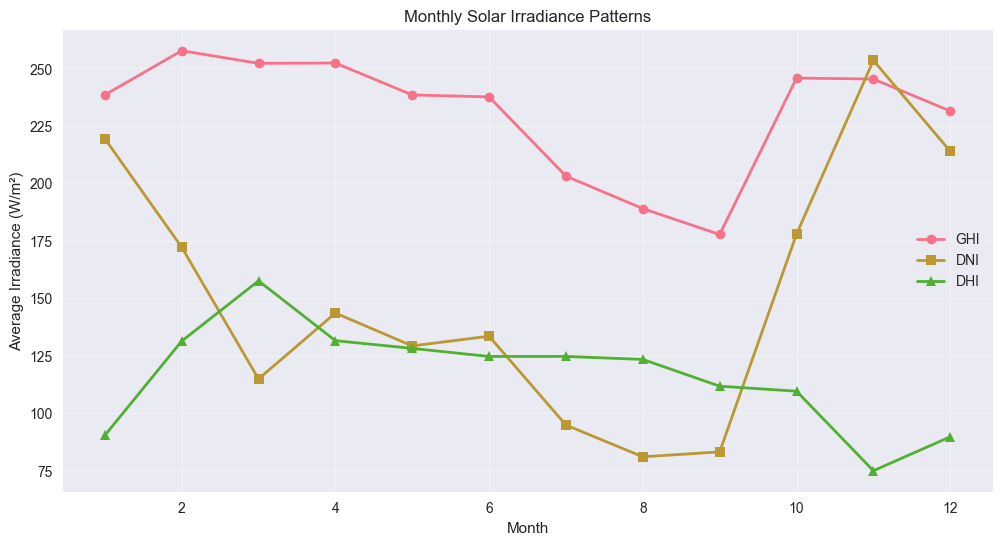


4. 💡 KEY INSIGHTS
   🌞 Peak GHI: 783.7 W/m² at 11:00
   🌡️ Peak Temp: 33.3°C at 14:00
   📈 Best Month: Month 2 (257.7 W/m²)
   📊 Daily GHI Range: 786.5 W/m²

✅ TIME SERIES ANALYSIS COMPLETED!


In [9]:
# ⏰ TIME SERIES ANALYSIS
print("="*50)
print("TIME SERIES ANALYSIS")
print("="*50)

# Convert timestamp and create time features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Month'] = df['Timestamp'].dt.month

# 1. Time Series Line Charts
print("\n1. 📈 TIME SERIES TRENDS")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Time Series Analysis - Solar Data', fontsize=16, fontweight='bold')

# GHI over time
axes[0,0].plot(df['Timestamp'], df['GHI'], alpha=0.7, linewidth=0.5)
axes[0,0].set_title('Global Horizontal Irradiance (GHI)')
axes[0,0].set_ylabel('GHI (W/m²)')
axes[0,0].grid(True, alpha=0.3)

# DNI over time
axes[0,1].plot(df['Timestamp'], df['DNI'], alpha=0.7, linewidth=0.5, color='orange')
axes[0,1].set_title('Direct Normal Irradiance (DNI)')
axes[0,1].set_ylabel('DNI (W/m²)')
axes[0,1].grid(True, alpha=0.3)

# DHI over time
axes[1,0].plot(df['Timestamp'], df['DHI'], alpha=0.7, linewidth=0.5, color='green')
axes[1,0].set_title('Diffuse Horizontal Irradiance (DHI)')
axes[1,0].set_ylabel('DHI (W/m²)')
axes[1,0].grid(True, alpha=0.3)

# Temperature over time
axes[1,1].plot(df['Timestamp'], df['Tamb'], alpha=0.7, linewidth=0.5, color='red')
axes[1,1].set_title('Ambient Temperature')
axes[1,1].set_ylabel('Temperature (°C)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Daily Patterns
print("\n2. 🌅 DAILY PATTERNS")

daily_patterns = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Daily solar pattern
axes[0].plot(daily_patterns.index, daily_patterns['GHI'], label='GHI', marker='o', linewidth=2)
axes[0].plot(daily_patterns.index, daily_patterns['DNI'], label='DNI', marker='s', linewidth=2)
axes[0].plot(daily_patterns.index, daily_patterns['DHI'], label='DHI', marker='^', linewidth=2)
axes[0].set_title('Average Solar Irradiance by Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Irradiance (W/m²)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Daily temperature pattern
axes[1].plot(daily_patterns.index, daily_patterns['Tamb'], color='red', marker='o', linewidth=2)
axes[1].set_title('Average Temperature by Hour')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Temperature (°C)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Monthly Patterns
print("\n3. 📅 MONTHLY PATTERNS")

monthly_patterns = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_patterns.index, monthly_patterns['GHI'], marker='o', linewidth=2, label='GHI')
plt.plot(monthly_patterns.index, monthly_patterns['DNI'], marker='s', linewidth=2, label='DNI')
plt.plot(monthly_patterns.index, monthly_patterns['DHI'], marker='^', linewidth=2, label='DHI')
plt.title('Monthly Solar Irradiance Patterns')
plt.xlabel('Month')
plt.ylabel('Average Irradiance (W/m²)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. Key Insights
print("\n4. 💡 KEY INSIGHTS")

# Peak hours
peak_hour_ghi = daily_patterns['GHI'].idxmax()
peak_ghi = daily_patterns['GHI'].max()
peak_hour_temp = daily_patterns['Tamb'].idxmax()
peak_temp = daily_patterns['Tamb'].max()

print(f"   🌞 Peak GHI: {peak_ghi:.1f} W/m² at {peak_hour_ghi}:00")
print(f"   🌡️ Peak Temp: {peak_temp:.1f}°C at {peak_hour_temp}:00")

# Best month
best_month = monthly_patterns['GHI'].idxmax()
best_month_ghi = monthly_patterns['GHI'].max()
print(f"   📈 Best Month: Month {best_month} ({best_month_ghi:.1f} W/m²)")

# Daily range
daily_range_ghi = daily_patterns['GHI'].max() - daily_patterns['GHI'].min()
print(f"   📊 Daily GHI Range: {daily_range_ghi:.1f} W/m²")

print("\n" + "="*50)
print("✅ TIME SERIES ANALYSIS COMPLETED!")
print("="*50)

CLEANING IMPACT ANALYSIS

📊 AVERAGE SENSOR READINGS:
                ModA        ModB
Cleaning                        
0         225.979064  219.401351
1         535.186477  532.211744

📈 PERFORMANCE IMPROVEMENT:
   ModA: +136.8%
   ModB: +142.6%


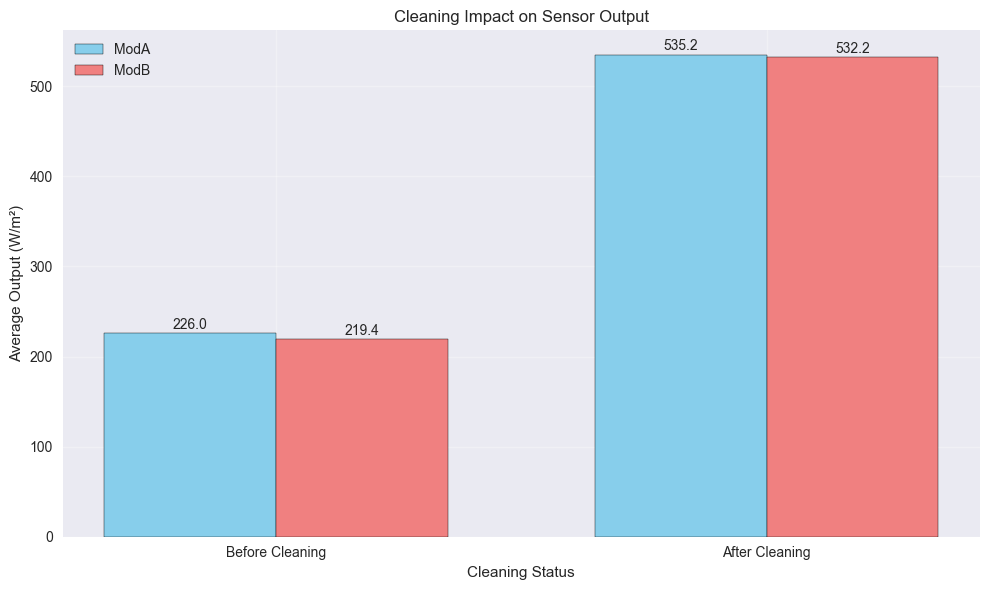


✅ CLEANING IMPACT ANALYSIS COMPLETED!


In [10]:
# 🧼 CLEANING IMPACT ANALYSIS
print("="*50)
print("CLEANING IMPACT ANALYSIS")
print("="*50)

if 'Cleaning' in df.columns:
    # Group by Cleaning flag and calculate averages
    cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
    
    print("\n📊 AVERAGE SENSOR READINGS:")
    print(cleaning_impact)
    
    # Calculate improvement percentages
    if len(cleaning_impact) > 1:
        moda_improvement = ((cleaning_impact.loc[1, 'ModA'] - cleaning_impact.loc[0, 'ModA']) / cleaning_impact.loc[0, 'ModA']) * 100
        modb_improvement = ((cleaning_impact.loc[1, 'ModB'] - cleaning_impact.loc[0, 'ModB']) / cleaning_impact.loc[0, 'ModB']) * 100
        
        print(f"\n📈 PERFORMANCE IMPROVEMENT:")
        print(f"   ModA: {moda_improvement:+.1f}%")
        print(f"   ModB: {modb_improvement:+.1f}%")
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    
    x = np.arange(2)
    width = 0.35
    
    plt.bar(x - width/2, cleaning_impact['ModA'], width, label='ModA', color='skyblue', edgecolor='black')
    plt.bar(x + width/2, cleaning_impact['ModB'], width, label='ModB', color='lightcoral', edgecolor='black')
    
    plt.xlabel('Cleaning Status')
    plt.ylabel('Average Output (W/m²)')
    plt.title('Cleaning Impact on Sensor Output')
    plt.xticks(x, ['Before Cleaning', 'After Cleaning'])
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(cleaning_impact['ModA']):
        plt.text(i - width/2, v + 5, f'{v:.1f}', ha='center')
    for i, v in enumerate(cleaning_impact['ModB']):
        plt.text(i + width/2, v + 5, f'{v:.1f}', ha='center')
    
    plt.tight_layout()
    plt.show()

else:
    print("❌ 'Cleaning' column not found in dataset")

print("\n" + "="*50)
print("✅ CLEANING IMPACT ANALYSIS COMPLETED!")
print("="*50)

CORRELATION & RELATIONSHIP ANALYSIS

1. Correlation Heatmap


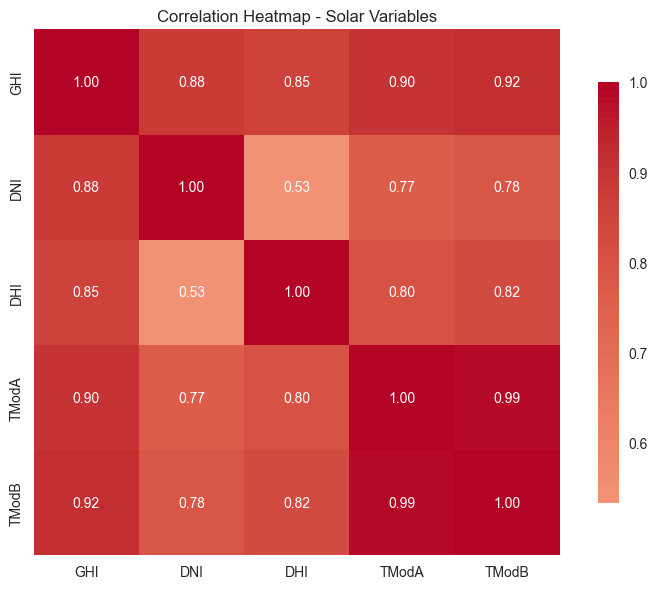


Top correlations with GHI:
   TModB: 0.919
   TModA: 0.898
   DNI: 0.877
   DHI: 0.852

2. Relationship Scatter Plots


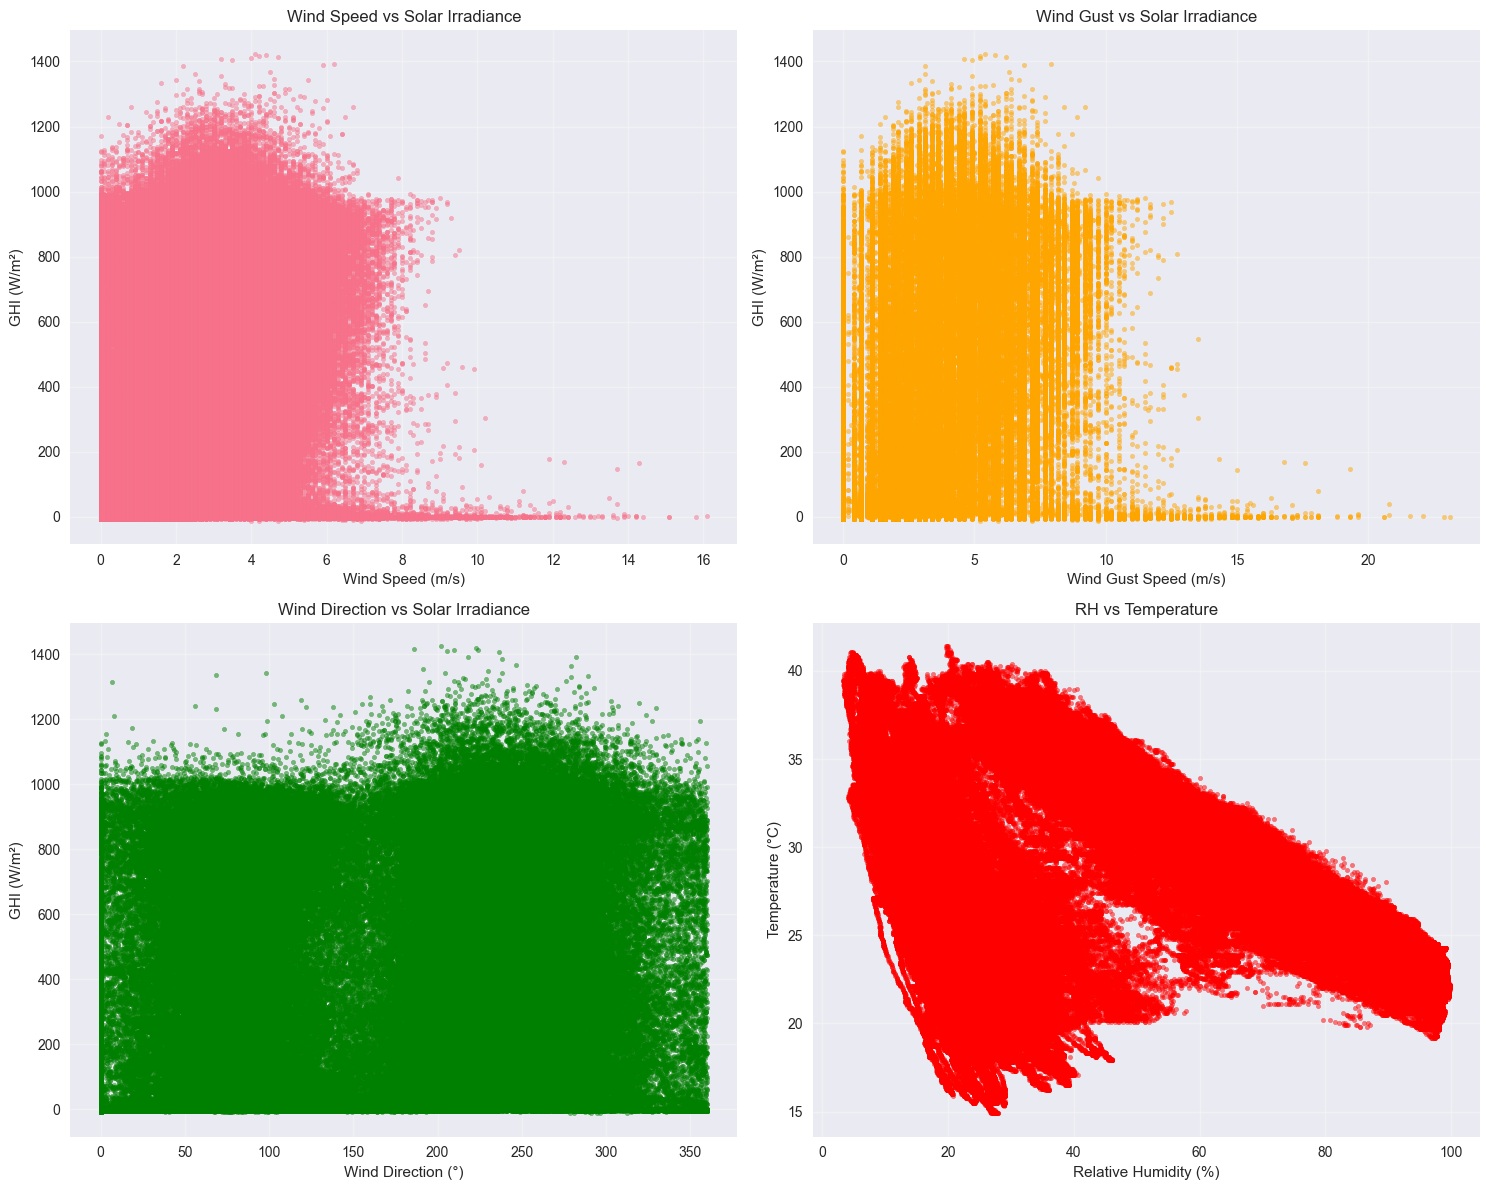


3. RH vs GHI Analysis


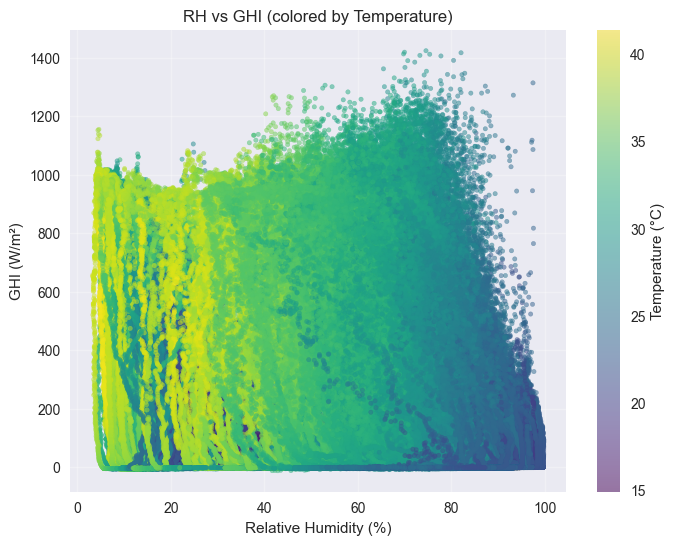


4. Key Relationship Insights
   Wind Speed vs GHI: 0.422
   RH vs Temperature: -0.400
   RH vs GHI: -0.258

CORRELATION ANALYSIS COMPLETED


In [11]:
# Correlation & Relationship Analysis
print("="*50)
print("CORRELATION & RELATIONSHIP ANALYSIS")
print("="*50)

# 1. Correlation Heatmap
print("\n1. Correlation Heatmap")

correlation_vars = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
available_vars = [var for var in correlation_vars if var in df.columns]

corr_matrix = df[available_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap - Solar Variables')
plt.tight_layout()
plt.show()

# Top correlations with GHI
print("\nTop correlations with GHI:")
ghi_correlations = corr_matrix['GHI'].sort_values(ascending=False)
for var, corr in ghi_correlations.items():
    if var != 'GHI':
        print(f"   {var}: {corr:.3f}")

# 2. Scatter Plots
print("\n2. Relationship Scatter Plots")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Wind Speed vs GHI
axes[0,0].scatter(df['WS'], df['GHI'], alpha=0.5, s=10)
axes[0,0].set_xlabel('Wind Speed (m/s)')
axes[0,0].set_ylabel('GHI (W/m²)')
axes[0,0].set_title('Wind Speed vs Solar Irradiance')
axes[0,0].grid(True, alpha=0.3)

# Wind Gust vs GHI
if 'WSgust' in df.columns:
    axes[0,1].scatter(df['WSgust'], df['GHI'], alpha=0.5, s=10, color='orange')
    axes[0,1].set_xlabel('Wind Gust Speed (m/s)')
    axes[0,1].set_ylabel('GHI (W/m²)')
    axes[0,1].set_title('Wind Gust vs Solar Irradiance')
    axes[0,1].grid(True, alpha=0.3)

# Wind Direction vs GHI
if 'WD' in df.columns:
    axes[1,0].scatter(df['WD'], df['GHI'], alpha=0.5, s=10, color='green')
    axes[1,0].set_xlabel('Wind Direction (°)')
    axes[1,0].set_ylabel('GHI (W/m²)')
    axes[1,0].set_title('Wind Direction vs Solar Irradiance')
    axes[1,0].grid(True, alpha=0.3)

# RH vs Temperature
axes[1,1].scatter(df['RH'], df['Tamb'], alpha=0.5, s=10, color='red')
axes[1,1].set_xlabel('Relative Humidity (%)')
axes[1,1].set_ylabel('Temperature (°C)')
axes[1,1].set_title('RH vs Temperature')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Additional RH vs GHI Plot
print("\n3. RH vs GHI Analysis")

plt.figure(figsize=(8, 6))
plt.scatter(df['RH'], df['GHI'], alpha=0.5, s=10, c=df['Tamb'], cmap='viridis')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.title('RH vs GHI (colored by Temperature)')
plt.grid(True, alpha=0.3)
plt.show()

# 4. Correlation Insights
print("\n4. Key Relationship Insights")

# Calculate correlations
ws_ghi_corr = df['WS'].corr(df['GHI'])
rh_tamb_corr = df['RH'].corr(df['Tamb'])
rh_ghi_corr = df['RH'].corr(df['GHI'])

print(f"   Wind Speed vs GHI: {ws_ghi_corr:.3f}")
print(f"   RH vs Temperature: {rh_tamb_corr:.3f}")
print(f"   RH vs GHI: {rh_ghi_corr:.3f}")

# Interpretation
if rh_ghi_corr < -0.3:
    print("   High humidity correlates with lower solar irradiance")

if rh_tamb_corr < -0.5:
    print("   High humidity often means lower temperatures")

print("\n" + "="*50)
print("CORRELATION ANALYSIS COMPLETED")
print("="*50)


WIND & DISTRIBUTION ANALYSIS

1. Wind Analysis
Average Wind Speed: 2.37 m/s
Max Wind Speed: 16.10 m/s
Predominant Wind Direction: 0.0°


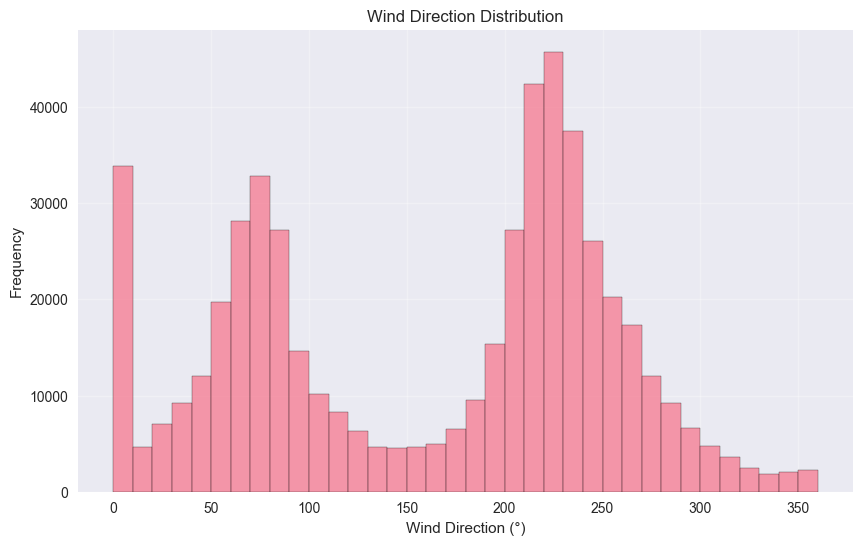


2. Distribution Analysis


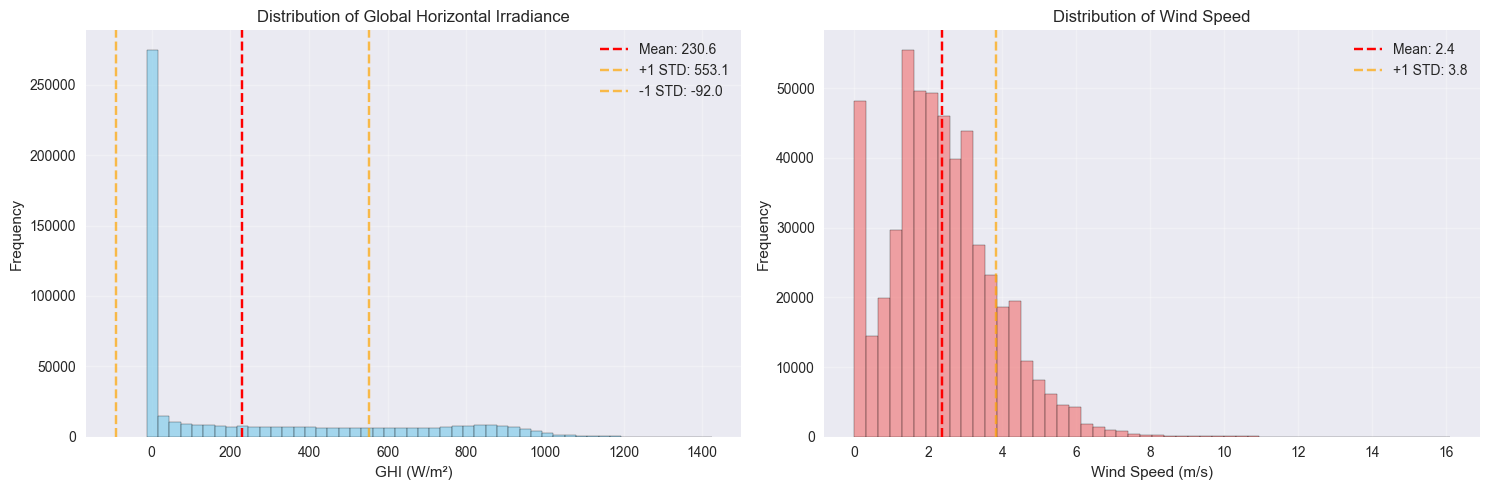


3. Distribution Statistics
GHI Statistics:
   Mean: 230.56 W/m²
   Std:  322.53 W/m²
   Min:  -12.70 W/m²
   Max:  1424.00 W/m²
Wind Speed Statistics:
   Mean: 2.37 m/s
   Std:  1.46 m/s
   Min:  0.00 m/s
   Max:  16.10 m/s

WIND & DISTRIBUTION ANALYSIS COMPLETED


In [12]:
# Wind & Distribution Analysis
print("="*50)
print("WIND & DISTRIBUTION ANALYSIS")
print("="*50)

# 1. Wind Analysis
print("\n1. Wind Analysis")

if 'WD' in df.columns and 'WS' in df.columns:
    # Basic wind statistics
    print(f"Average Wind Speed: {df['WS'].mean():.2f} m/s")
    print(f"Max Wind Speed: {df['WS'].max():.2f} m/s")
    print(f"Predominant Wind Direction: {df['WD'].mode().iloc[0]:.1f}°")
    
    # Simple wind direction histogram (alternative to wind rose)
    plt.figure(figsize=(10, 6))
    plt.hist(df['WD'].dropna(), bins=36, alpha=0.7, edgecolor='black')
    plt.xlabel('Wind Direction (°)')
    plt.ylabel('Frequency')
    plt.title('Wind Direction Distribution')
    plt.grid(True, alpha=0.3)
    plt.show()
    
else:
    print("Wind direction or speed data not available")

# 2. Distribution Analysis
print("\n2. Distribution Analysis")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# GHI Distribution
axes[0].hist(df['GHI'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_xlabel('GHI (W/m²)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Global Horizontal Irradiance')
axes[0].grid(True, alpha=0.3)

# Add statistics to GHI plot
ghi_mean = df['GHI'].mean()
ghi_std = df['GHI'].std()
axes[0].axvline(ghi_mean, color='red', linestyle='--', label=f'Mean: {ghi_mean:.1f}')
axes[0].axvline(ghi_mean + ghi_std, color='orange', linestyle='--', alpha=0.7, label=f'+1 STD: {ghi_mean + ghi_std:.1f}')
axes[0].axvline(ghi_mean - ghi_std, color='orange', linestyle='--', alpha=0.7, label=f'-1 STD: {ghi_mean - ghi_std:.1f}')
axes[0].legend()

# Wind Speed Distribution
axes[1].hist(df['WS'].dropna(), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Wind Speed (m/s)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Wind Speed')
axes[1].grid(True, alpha=0.3)

# Add statistics to WS plot
ws_mean = df['WS'].mean()
ws_std = df['WS'].std()
axes[1].axvline(ws_mean, color='red', linestyle='--', label=f'Mean: {ws_mean:.1f}')
axes[1].axvline(ws_mean + ws_std, color='orange', linestyle='--', alpha=0.7, label=f'+1 STD: {ws_mean + ws_std:.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# 3. Distribution Statistics
print("\n3. Distribution Statistics")
print(f"GHI Statistics:")
print(f"   Mean: {df['GHI'].mean():.2f} W/m²")
print(f"   Std:  {df['GHI'].std():.2f} W/m²")
print(f"   Min:  {df['GHI'].min():.2f} W/m²")
print(f"   Max:  {df['GHI'].max():.2f} W/m²")

if 'WS' in df.columns:
    print(f"Wind Speed Statistics:")
    print(f"   Mean: {df['WS'].mean():.2f} m/s")
    print(f"   Std:  {df['WS'].std():.2f} m/s")
    print(f"   Min:  {df['WS'].min():.2f} m/s")
    print(f"   Max:  {df['WS'].max():.2f} m/s")

print("\n" + "="*50)
print("WIND & DISTRIBUTION ANALYSIS COMPLETED")
print("="*50)

TEMPERATURE ANALYSIS

1. RH vs Temperature Relationship


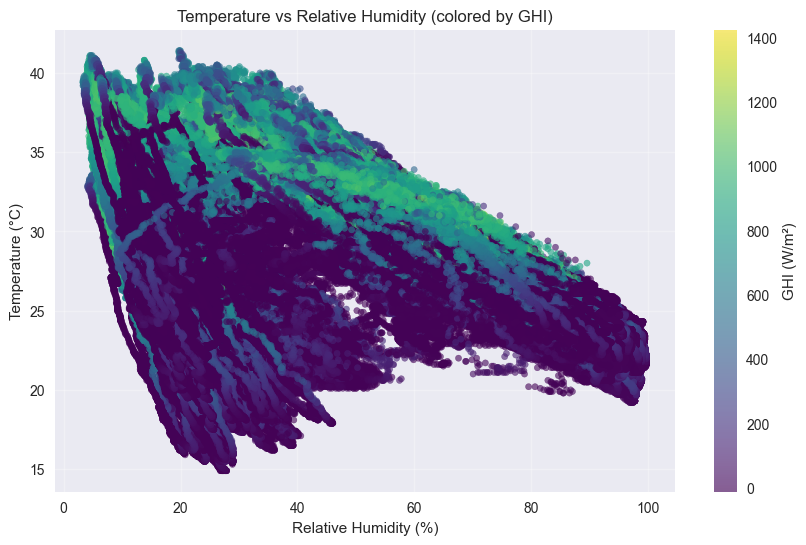


2. RH vs Solar Radiation


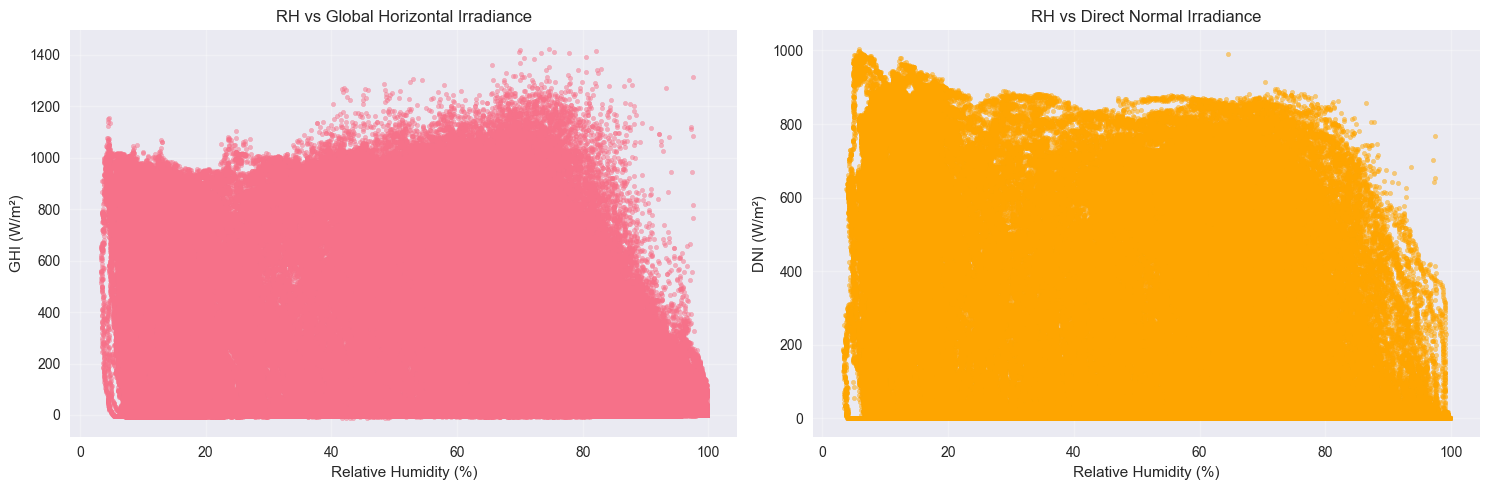


3. Temperature Patterns by Humidity Levels
Average Conditions by Humidity Level:
                      Tamb           GHI             DNI        
                      mean   std    mean     std    mean     std
RH_Bin                                                          
Low (0-30%)          28.73  6.05  288.15  346.62  234.02  297.94
Medium (30-60%)      30.47  4.89  305.79  360.74  197.27  262.24
High (60-90%)        26.99  2.22  213.64  299.47  110.29  213.01
Very High (90-100%)  23.15  1.17   25.87   71.54    7.02   43.54


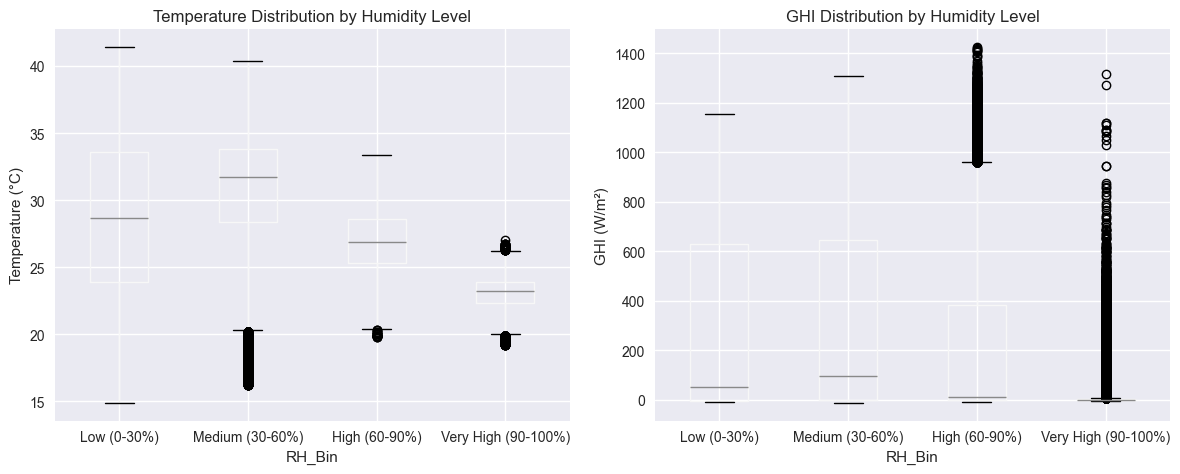


4. Correlation Analysis
Correlation Matrix:
         RH   Tamb
RH    1.000 -0.400
Tamb -0.400  1.000
GHI  -0.258  0.563
DNI  -0.328  0.504
DHI  -0.155  0.490

5. Key Insights
RH vs Temperature correlation: -0.400
RH vs GHI correlation: -0.258
RH vs DNI correlation: -0.328
   - Higher humidity generally associated with lower temperatures
   - Higher humidity tends to reduce solar irradiance
   - Direct normal irradiance decreases with higher humidity

Optimal conditions analysis:
   Average RH during high solar output: 40.3%

TEMPERATURE ANALYSIS COMPLETED


In [13]:
# Temperature Analysis
print("="*50)
print("TEMPERATURE ANALYSIS")
print("="*50)

# 1. RH vs Temperature Relationship
print("\n1. RH vs Temperature Relationship")

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['RH'], df['Tamb'], c=df['GHI'], alpha=0.6, 
                     cmap='viridis', s=20)
plt.colorbar(scatter, label='GHI (W/m²)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Relative Humidity (colored by GHI)')
plt.grid(True, alpha=0.3)
plt.show()

# 2. RH vs Solar Radiation
print("\n2. RH vs Solar Radiation")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# RH vs GHI
axes[0].scatter(df['RH'], df['GHI'], alpha=0.5, s=10)
axes[0].set_xlabel('Relative Humidity (%)')
axes[0].set_ylabel('GHI (W/m²)')
axes[0].set_title('RH vs Global Horizontal Irradiance')
axes[0].grid(True, alpha=0.3)

# RH vs DNI
axes[1].scatter(df['RH'], df['DNI'], alpha=0.5, s=10, color='orange')
axes[1].set_xlabel('Relative Humidity (%)')
axes[1].set_ylabel('DNI (W/m²)')
axes[1].set_title('RH vs Direct Normal Irradiance')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Temperature Binned by RH
print("\n3. Temperature Patterns by Humidity Levels")

# Create RH bins
df['RH_Bin'] = pd.cut(df['RH'], bins=[0, 30, 60, 90, 100], 
                     labels=['Low (0-30%)', 'Medium (30-60%)', 'High (60-90%)', 'Very High (90-100%)'])

# Calculate statistics by RH bin
rh_bin_stats = df.groupby('RH_Bin').agg({
    'Tamb': ['mean', 'std'],
    'GHI': ['mean', 'std'],
    'DNI': ['mean', 'std']
}).round(2)

print("Average Conditions by Humidity Level:")
print(rh_bin_stats)

# 4. Visualization of RH bin effects
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df.boxplot(column='Tamb', by='RH_Bin', ax=plt.gca())
plt.title('Temperature Distribution by Humidity Level')
plt.suptitle('')
plt.ylabel('Temperature (°C)')

plt.subplot(1, 2, 2)
df.boxplot(column='GHI', by='RH_Bin', ax=plt.gca())
plt.title('GHI Distribution by Humidity Level')
plt.suptitle('')
plt.ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()

# 5. Correlation Analysis
print("\n4. Correlation Analysis")

correlations = df[['RH', 'Tamb', 'GHI', 'DNI', 'DHI']].corr()

print("Correlation Matrix:")
print(correlations[['RH', 'Tamb']].round(3))

# 6. Key Insights
print("\n5. Key Insights")

rh_tamb_corr = df['RH'].corr(df['Tamb'])
rh_ghi_corr = df['RH'].corr(df['GHI'])
rh_dni_corr = df['RH'].corr(df['DNI'])

print(f"RH vs Temperature correlation: {rh_tamb_corr:.3f}")
print(f"RH vs GHI correlation: {rh_ghi_corr:.3f}")
print(f"RH vs DNI correlation: {rh_dni_corr:.3f}")

if rh_tamb_corr < -0.3:
    print("   - Higher humidity generally associated with lower temperatures")
    
if rh_ghi_corr < -0.2:
    print("   - Higher humidity tends to reduce solar irradiance")
    
if rh_dni_corr < -0.2:
    print("   - Direct normal irradiance decreases with higher humidity")

# Best conditions analysis
best_conditions = df[(df['GHI'] > df['GHI'].quantile(0.75)) & 
                     (df['Tamb'] > df['Tamb'].quantile(0.5))]

if len(best_conditions) > 0:
    avg_rh_best = best_conditions['RH'].mean()
    print(f"\nOptimal conditions analysis:")
    print(f"   Average RH during high solar output: {avg_rh_best:.1f}%")

print("\n" + "="*50)
print("TEMPERATURE ANALYSIS COMPLETED")
print("="*50)

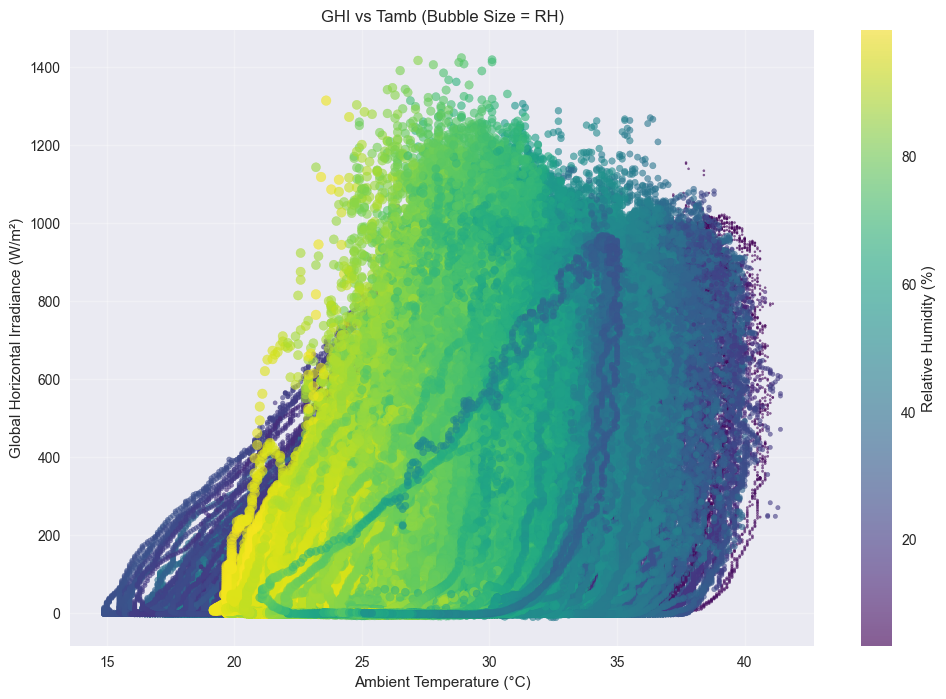

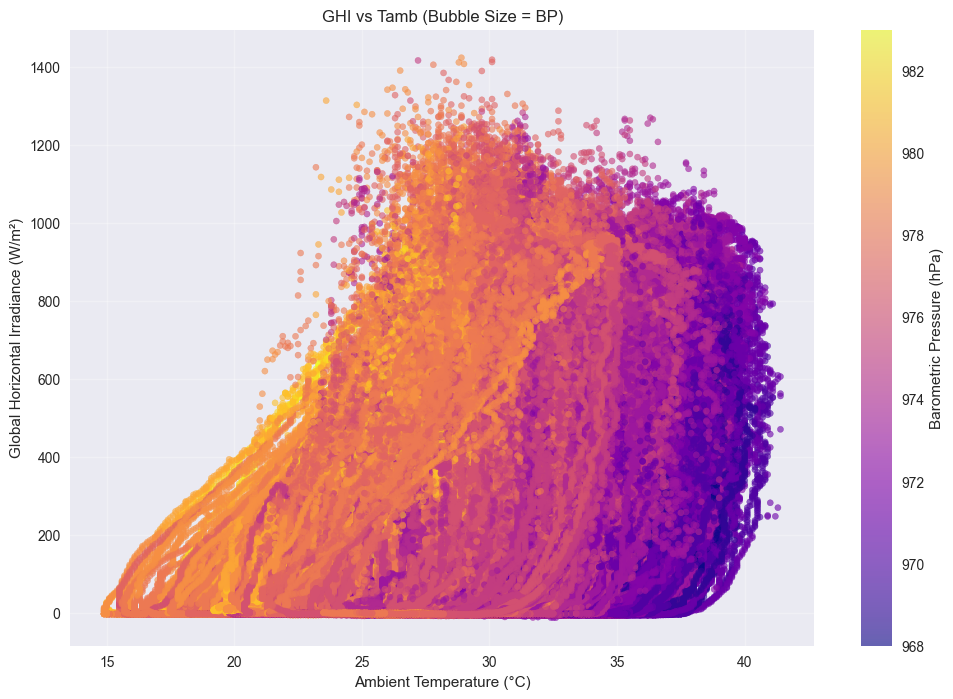

In [14]:
# Bubble Chart: GHI vs Tamb with bubble size = RH
plt.figure(figsize=(12, 8))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'] / 2, alpha=0.6, c=df['RH'], cmap='viridis')
plt.colorbar(label='Relative Humidity (%)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.title('GHI vs Tamb (Bubble Size = RH)')
plt.grid(True, alpha=0.3)
plt.show()

# Bubble Chart: GHI vs Tamb with bubble size = BP (if BP column exists)
if 'BP' in df.columns:
    plt.figure(figsize=(12, 8))
    plt.scatter(df['Tamb'], df['GHI'], s=df['BP'] / 50, alpha=0.6, c=df['BP'], cmap='plasma')
    plt.colorbar(label='Barometric Pressure (hPa)')
    plt.xlabel('Ambient Temperature (°C)')
    plt.ylabel('Global Horizontal Irradiance (W/m²)')
    plt.title('GHI vs Tamb (Bubble Size = BP)')
    plt.grid(True, alpha=0.3)
    plt.show()

In [15]:
# Key Performance Indicators & Insights
print("="*50)
print("KEY PERFORMANCE INDICATORS & INSIGHTS")
print("="*50)

# 1. Solar Potential KPIs
print("\n1. SOLAR POTENTIAL KPIs")

# Basic solar metrics
avg_ghi = df['GHI'].mean()
max_ghi = df['GHI'].max()
ghi_variability = (df['GHI'].std() / df['GHI'].mean()) * 100

print(f"Average GHI: {avg_ghi:.1f} W/m²")
print(f"Peak GHI: {max_ghi:.1f} W/m²")
print(f"GHI Variability: {ghi_variability:.1f}%")

# Daily generation pattern
daily_ghi = df.groupby('Hour')['GHI'].mean()
peak_generation_hour = daily_ghi.idxmax()
peak_generation_value = daily_ghi.max()

print(f"Peak Generation Hour: {peak_generation_hour}:00")
print(f"Peak Generation Value: {peak_generation_value:.1f} W/m²")

# 2. Data Quality KPIs
print("\n2. DATA QUALITY KPIs")

# Missing data analysis
total_missing = df.isnull().sum().sum()
missing_percentage = (total_missing / (df.shape[0] * df.shape[1])) * 100

print(f"Total Missing Values: {total_missing}")
print(f"Missing Data Percentage: {missing_percentage:.2f}%")

# Outlier analysis
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI']]))
outlier_count = (z_scores > 3).sum().sum()
outlier_percentage = (outlier_count / (df.shape[0] * 3)) * 100

print(f"Outliers Detected: {outlier_count}")
print(f"Outlier Percentage: {outlier_percentage:.2f}%")

# 3. Statistical Distribution Insights
print("\n3. STATISTICAL DISTRIBUTION INSIGHTS")

# Distribution characteristics
for col in ['GHI', 'Tamb', 'WS']:
    if col in df.columns:
        skewness = stats.skew(df[col].dropna())
        kurtosis = stats.kurtosis(df[col].dropna())
        
        print(f"\n{col} Distribution:")
        print(f"  Skewness: {skewness:.3f}")
        print(f"  Kurtosis: {kurtosis:.3f}")
        
        if abs(skewness) > 1:
            print(f"  Highly skewed distribution")
        elif abs(skewness) > 0.5:
            print(f"  Moderately skewed distribution")
        else:
            print(f"  Approximately symmetric distribution")

# 4. Environmental Relationship KPIs
print("\n4. ENVIRONMENTAL RELATIONSHIP KPIs")

# Key correlations
correlations = {
    'RH vs GHI': df['RH'].corr(df['GHI']),
    'Temperature vs GHI': df['Tamb'].corr(df['GHI']),
    'Wind Speed vs GHI': df['WS'].corr(df['GHI']),
    'RH vs Temperature': df['RH'].corr(df['Tamb'])
}

for relationship, corr in correlations.items():
    print(f"{relationship}: {corr:.3f}")
    
    if abs(corr) > 0.7:
        print(f"  Strong relationship")
    elif abs(corr) > 0.5:
        print(f"  Moderate relationship")
    elif abs(corr) > 0.3:
        print(f"  Weak relationship")
    else:
        print(f"  Very weak or no relationship")

# 5. Actionable Insights
print("\n5. ACTIONABLE INSIGHTS")

# Optimal operating conditions
high_performance = df[df['GHI'] > df['GHI'].quantile(0.75)]

if len(high_performance) > 0:
    optimal_rh = high_performance['RH'].mean()
    optimal_temp = high_performance['Tamb'].mean()
    optimal_ws = high_performance['WS'].mean()
    
    print(f"Optimal conditions for high solar output:")
    print(f"  Relative Humidity: {optimal_rh:.1f}%")
    print(f"  Temperature: {optimal_temp:.1f}°C")
    print(f"  Wind Speed: {optimal_ws:.1f} m/s")

# Cleaning impact (if data available)
if 'Cleaning' in df.columns:
    cleaning_effect = df.groupby('Cleaning')['ModA'].mean()
    if len(cleaning_effect) > 1:
        improvement = ((cleaning_effect.iloc[1] - cleaning_effect.iloc[0]) / cleaning_effect.iloc[0]) * 100
        print(f"Cleaning improves performance by: {improvement:.1f}%")

# 6. Data Quality Recommendations
print("\n6. DATA QUALITY RECOMMENDATIONS")

if missing_percentage > 5:
    print("Recommendation: Implement data imputation strategies")
else:
    print("Data quality: Good")

if outlier_percentage > 5:
    print("Recommendation: Review sensor calibration and maintenance")
else:
    print("Outlier levels: Acceptable")

# 7. Performance Benchmarks
print("\n7. PERFORMANCE BENCHMARKS")

# Compare with typical solar ranges
if avg_ghi > 500:
    print("Solar Potential: Excellent")
elif avg_ghi > 400:
    print("Solar Potential: Good")
elif avg_ghi > 300:
    print("Solar Potential: Moderate")
else:
    print("Solar Potential: Low")

print("\n" + "="*50)
print("KPI ANALYSIS COMPLETED")
print("="*50)

KEY PERFORMANCE INDICATORS & INSIGHTS

1. SOLAR POTENTIAL KPIs
Average GHI: 230.6 W/m²
Peak GHI: 1424.0 W/m²
GHI Variability: 139.9%
Peak Generation Hour: 11:00
Peak Generation Value: 783.7 W/m²

2. DATA QUALITY KPIs
Total Missing Values: 525600
Missing Data Percentage: 4.55%
Outliers Detected: 4782
Outlier Percentage: 0.30%

3. STATISTICAL DISTRIBUTION INSIGHTS

GHI Distribution:
  Skewness: 1.108
  Kurtosis: -0.223
  Highly skewed distribution

Tamb Distribution:
  Skewness: 0.301
  Kurtosis: -0.437
  Approximately symmetric distribution

WS Distribution:
  Skewness: 0.691
  Kurtosis: 1.199
  Moderately skewed distribution

4. ENVIRONMENTAL RELATIONSHIP KPIs
RH vs GHI: -0.258
  Very weak or no relationship
Temperature vs GHI: 0.563
  Moderate relationship
Wind Speed vs GHI: 0.422
  Weak relationship
RH vs Temperature: -0.400
  Weak relationship

5. ACTIONABLE INSIGHTS
Optimal conditions for high solar output:
  Relative Humidity: 42.2%
  Temperature: 31.9°C
  Wind Speed: 3.3 m/s
Clea